In [2]:
import pandas as pd
import sys
import os
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"

In [4]:
# create dictionaries for males and females

allmales={}

allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales={}
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls',header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

#print allmales['asian'].columns #checking that dictionaries exist


In [5]:
# scatter plot of  male and female salaries by ethnicity
from pandas.tools.plotting import scatter_matrix

for col in allmales:
    nonreal  = allmales[col].applymap(np.isreal)
    for i in allmales[col] :
        if nonreal.sum()[i]>1 and nonreal.sum()[i]<49:
            allmales[col][i][~nonreal[i]] = np.float('NaN')
            allmales[col][i] = allmales[col][i].astype(float)
            
            
for col in allfemales:
    nonreal  = allfemales[col].applymap(np.isreal)
    for i in allfemales[col] :
        if nonreal.sum()[i]>1 and nonreal.sum()[i]<49:
            allfemales[col][i][~nonreal[i]] = np.float('NaN')
            allfemales[col][i] = allfemales[col][i].astype(float)            



C:\Users\Maria\Anaconda\lib\site-packages\IPython\kernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Maria\Anaconda\lib\site-packages\IPython\kernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000173678D0>,
        ...,
        ...,
        ...,
       ..., 
        ...,
        ...,
        ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000009E58EDD8>]], dtype=object)

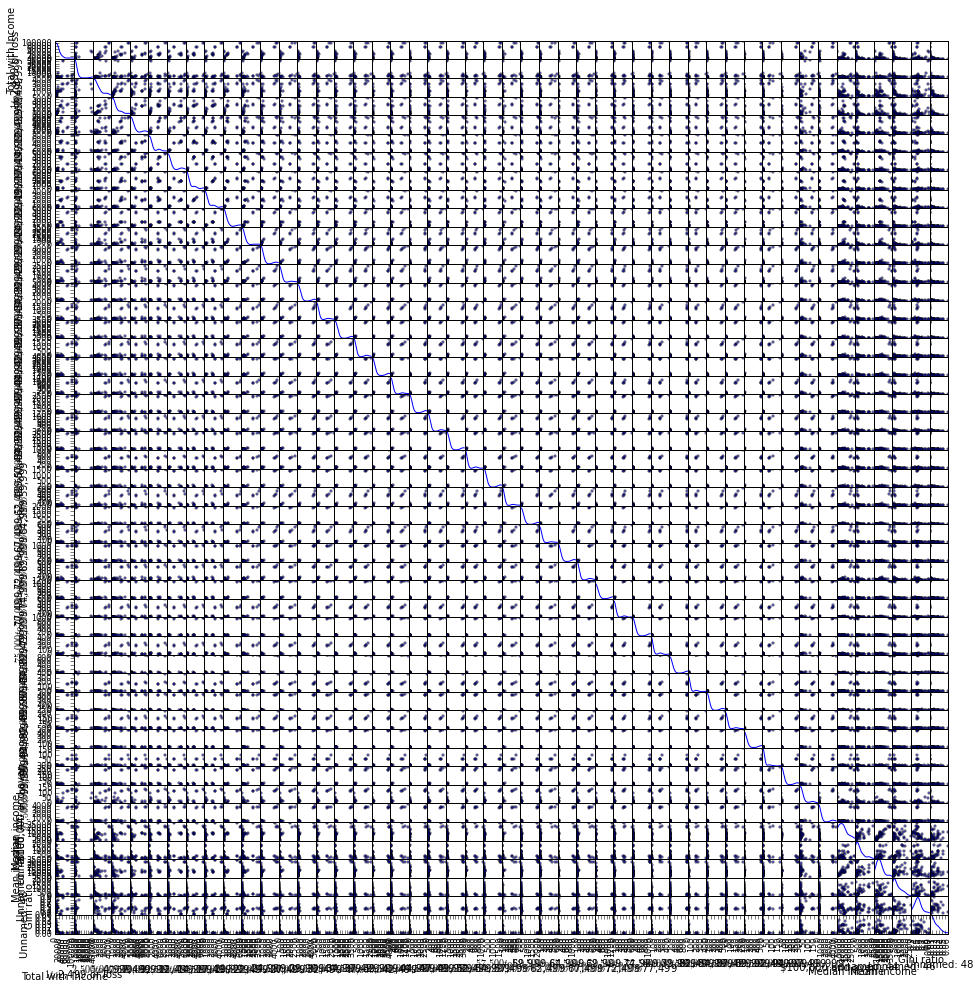

In [6]:
# scatter plot takes forever to load...
scatter_matrix (allfemales['all'], figsize=(16, 16), diagonal='kde')  

In [7]:
femaleInc = []
femaleInc = [allfemales['all']['Median income'][1], allfemales['white']['Median income'][1], 
    allfemales['black']['Median income'][1], allfemales['asian']['Median income'][1], allfemales['hispanic']['Median income'][1]]
print femaleInc

[22063.0, 23780.0, 20044.0, 24840.0, 17762.0]


In [8]:
maleInc = []
maleInc = [allmales['all']['Median income'][1], allmales['white']['Median income'][1], 
    allmales['black']['Median income'][1], allmales['asian']['Median income'][1], allmales['hispanic']['Median income'][1]]
print maleInc

[35228.0, 40122.0, 24855.0, 40153.0, 25411.0]


C:\Users\Maria\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


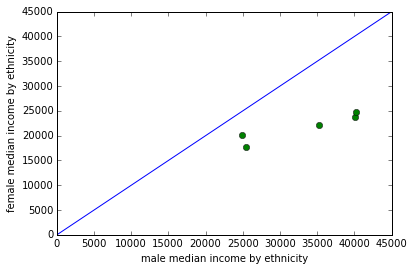

In [9]:
#plot the median income for each ethnicity, female income as a function of male :-/
pl.plot(maleInc, femaleInc, 'go')
pl.legend()
pl.xlabel('male median income by ethnicity')
pl.ylabel('female median income by ethnicity')

pl.plot([1, 45000], [1, 45000])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.70
Date:                Wed, 14 Oct 2015   Prob (F-statistic):             0.0176
Time:                        16:26:52   Log-Likelihood:                -40.948
No. Observations:                   5   AIC:                             85.90
Df Residuals:                       3   BIC:                             85.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9989.8444   2508.397      3.983      0.0

C:\Users\Maria\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


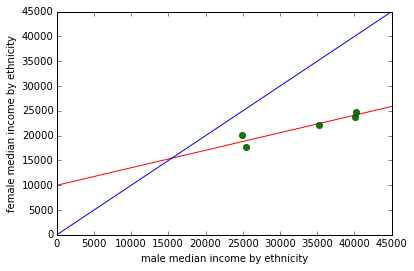

In [10]:
# run regression for 'all' median income, female income as a function of male, regardless of ethnicity
import statsmodels.api as sm
M = sm.add_constant(maleInc)
lm = sm.OLS(femaleInc, M).fit()
print (lm.summary())

# fit OLS regression results to plot
XLR = np.arange (1, 45000, 1)
YLR = 0.3531*XLR + 9989.84
pl.plot(XLR, YLR, 'red')

# add previous plot results
pl.plot(maleInc, femaleInc, 'go')
pl.xlabel('male median income by ethnicity')
pl.ylabel('female median income by ethnicity')
pl.plot([1, 45000], [1, 45000])

(0.90000000000000002, 0.037386073468498628)


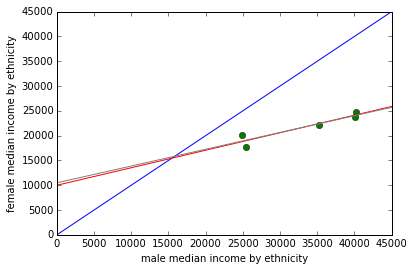

In [16]:
import scipy.stats as stats

cor = stats.spearmanr(maleInc, femaleInc)
#ms = np.std(maleInc)
#fs = np.std(femaleInc)
std(maleInc)/std(femaleInc)
beta1=cor[0]*std(femaleInc)/std(maleInc)
beta0=mean(femaleInc)-beta1*np.mean(maleInc)
print cor

# plot 3 - add analytical solution to previous plots
pl.plot(maleInc, femaleInc, 'go')
pl.xlabel('male median income by ethnicity')
pl.ylabel('female median income by ethnicity')
pl.plot([1, 45000], [1, 45000])
pl.plot(XLR, YLR, 'red')


xlr = np.arange (1, 45000, 1)
lm = beta1*xlr+beta0
pl.plot(xlr, lm, 'gray')


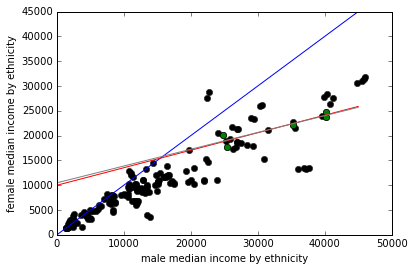

In [17]:
# plot all forms of income (wages, social security, disability, etc)
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

pl.plot(all_males, all_females, 'ko')
pl.xlabel('male median - all forms of income')
pl.ylabel('female median - all forms of income')

# add previous plots
pl.plot(maleInc, femaleInc, 'go')
pl.xlabel('male median income by ethnicity')
pl.ylabel('female median income by ethnicity')
pl.plot([1, 45000], [1, 45000])
pl.plot(XLR, YLR, 'red')
pl.plot(xlr, lm, 'gray')


Now pick a stipend, maybe your ideal stipend?
and predict what a woman in a position where a man recieves your ideal stipend would make
lastly do you have any comments about what these data tell us about race? how you would go about analyzing race differences with these data? (just a few sentences)

A: Regardless of income or stipend, women are making less then men irrespective of ethnicity. 